# CS404 HW3

Mehmet Enes Battal - 26354

# NQuenn with Hill Climbing

In [ ]:
import time
import random
import numpy as np
from random import shuffle
from random import randrange

def calculateNumberOfConflicts(position):
    """
    returns number of conflicts
    """
    numberOfConflicts = 0  # initialize as 0

    for i in range(0, len(position)):
        for j in range(i + 1, len(position)):
            if position[i] == position[j]:
                numberOfConflicts += 1  # increment if horizontal conflict
            elif abs(i - j) == abs(position[i] - position[j]):
                numberOfConflicts += 1  # increment if diagonal conflict

    return numberOfConflicts


def bestNeighbor(position):
    """
    returns the best neighbor - shd be best neighbor
    """
    # define current position's number of conflict as the min number of conflict
    min_numberOfConflicts = calculateNumberOfConflicts(position)

    # define best position as current position
    best_position = position
    for i in range(0, len(position)):
        for j in range(0, len(position)):
            if j != position[i]:
                temp = position.copy()
                temp[i] = j
                temp_numberOfConflicts = calculateNumberOfConflicts(temp)
                if temp_numberOfConflicts <= min_numberOfConflicts:
                    min_numberOfConflicts = temp_numberOfConflicts
                    best_position = temp
    return best_position

def randomNeighbor(position):
    """
    returns a random neighbor which is better than the current position
    """
    #add your solution
    possible_neighbors = []
    currentConflicts = calculateNumberOfConflicts(position)

    # define best position as current position, find all possible neighbors 
    # from current state and choose randomly among them
    neighbor = position
    for i in range(0, len(position)):
        for j in range(0, len(position)):
            if j != position[i]:
                temp = position.copy()
                temp[i] = j
                temp_numberOfConflicts = calculateNumberOfConflicts(temp)
                # if neighbor is better than current add to list
                if temp_numberOfConflicts < currentConflicts:
                    possible_neighbors.append(temp)

    # if there are better neighbor selects randomly and returns
    # if not, returns the current pposition
    if len(possible_neighbors) != 0:
      neighbor = random.choice(possible_neighbors)

    return neighbor

def printSolutionT(position):
    N = len(position)

    for i in range(N):
        row = ""
        for j in range(N):
            if position[i] == j:
                row += "X "
            else:
                row += "O "
        print(row)


In [ ]:
def NQueen(N, randomRestart=True, stochastic=False, upperBound=np.inf):
    if N in [2, 3]:
        raise ValueError("Failure, no solution exists for given N.")

    solved = False
    current_position = list(np.zeros(N))
    count = 0
    while (calculateNumberOfConflicts(current_position) > 0) and count < upperBound:
        # set an random initial position with N queen.
        # if position[k] = j, then there exist a queen at k,j
        # notice that this representation is indeed compact and suitable.
        initial_position = [randrange(N) for _ in range(N)]
        current_position = initial_position
        while True:        
            if stochastic:
                #add your solution
                neighbor = randomNeighbor(current_position)
            else:
                neighbor = bestNeighbor(current_position)

            if calculateNumberOfConflicts(neighbor) >= calculateNumberOfConflicts(
                current_position
            ):
                if randomRestart:
                    break # if no better neighbour, initialize a random position
                else:
                    if calculateNumberOfConflicts(current_position) != 0:
                        #print("Failure, no solution found.") !!!!!!!!!!
                        #printSolutionT(initial_position) !!!!!!!!!!!!
                        return solved, count
                    else:
                        #printSolutionT(current_position) !!!!!!!!!
                        return True, count
            
            # better placement is found, update current position
            current_position = neighbor 
        count += 1

    if randomRestart:
      pass
      # print("restart count:", count) !!!!!!!!

    if count >= upperBound:
      pass
        # print("Failure, no solution found.") !!!!!!!!
        #{printSolutionT(initial_position)}
    else:
        #printSolutionT(current_position) !!!!!!!!!!!!
        solved = True

    return solved, count


## Basic Hill Climbing Data

### N = 10

In [ ]:
N = 10 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for basic hill climbing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  success[i], iteration_num[i] = NQueen(N, randomRestart=False)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)
print(iteration_num)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for basic hill climbing with N = 10: 
Total elapsed time: 0.8960983753204346.
[0.010544061660766602, 0.00705409049987793, 0.006990671157836914, 0.013363838195800781, 0.01030278205871582, 0.01037287712097168, 0.009999275207519531, 0.008441448211669922, 0.009821176528930664, 0.00864863395690918, 0.009928226470947266, 0.008070945739746094, 0.010172605514526367, 0.011723756790161133, 0.01181793212890625, 0.008752584457397461, 0.008463859558105469, 0.008394956588745117, 0.008317708969116211, 0.00854349136352539, 0.010364055633544922, 0.009183883666992188, 0.007246494293212891, 0.010092020034790039, 0.011903762817382812, 0.006593227386474609, 0.010952949523925781, 0.013349294662475586, 0.006917238235473633, 0.00695347785949707, 0.010237693786621094, 0.010331392288208008, 0.00839090347290039, 0.013751745223999023, 0.010282278060913086, 0.011924505233764648, 0.011966705322265625, 0.0068264007568359375, 0.010232925415039062, 0.008122920989990234, 0.00970602035522461, 0.006509065628051758, 

### N = 20

In [ ]:
N = 20 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for basic hill climbing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  success[i], iteration_num[i] = NQueen(N, randomRestart=False)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)
print(iteration_num)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for basic hill climbing with N = 20: 
Total elapsed time: 25.242510080337524.
[0.33356642723083496, 0.24063611030578613, 0.2947549819946289, 0.30428028106689453, 0.24341058731079102, 0.33318233489990234, 0.24373316764831543, 0.2794933319091797, 0.26880550384521484, 0.2917783260345459, 0.3030402660369873, 0.2126922607421875, 0.21438884735107422, 0.2644333839416504, 0.253887414932251, 0.27443742752075195, 0.20900678634643555, 0.26854825019836426, 0.21302175521850586, 0.21987295150756836, 0.2353219985961914, 0.24439239501953125, 0.21469378471374512, 0.28098058700561523, 0.29100966453552246, 0.21930861473083496, 0.2162337303161621, 0.3279144763946533, 0.3197784423828125, 0.24911284446716309, 0.2704799175262451, 0.2425553798675537, 0.21597552299499512, 0.29993391036987305, 0.2733287811279297, 0.27477598190307617, 0.192091703414917, 0.234208345413208, 0.2887003421783447, 0.21742820739746094, 0.20732808113098145, 0.26425957679748535, 0.26816463470458984, 0.3270847797393799, 0.27455735206

## Random Restart Hill Climbing Data

### N = 10

In [ ]:
N = 10 # num of queens
upper_bounds = [10, 100 ,1000] # list of upper bounds for number of restarts
e_num = 100 # experimentation number

for k in upper_bounds:
  run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
  success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
  iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

  print("Data for random restart hill climbing with N = " + str(N) + " and k = " + str(k) + ": ")

  s = time.time()
  for i in range(e_num):
    start = time.time()
    success[i], iteration_num[i] = NQueen(N, randomRestart=True, upperBound=k)
    end = time.time()
    run_times[i] = end - start
    
  f = time.time()

  avg_time = np.mean(run_times)

  # find the average of the succesfull experiments
  sum = 0
  count = 0
  for i in range(e_num):
    if success[i] == True:
      sum = sum + iteration_num[i]
      count += 1

  avg_restarts = sum / count

  print(f"Total elapsed time: {f - s}.")
  print(run_times)
  print(success)
  print(iteration_num)

  print("\n")
  print("Percentage of success when k = " + str(k) + ": " + str(success.count(True)) + "%")
  print("Elapsed time to complete experiments on average: " + str(avg_time))
  print("Number of restarts on average of succesfull experiments: " + str(avg_restarts))
  print("\n")

Data for random restart hill climbing with N = 10 and k = 10: 
Total elapsed time: 6.976341247558594.
[0.07852864265441895, 0.08904910087585449, 0.09289312362670898, 0.09436488151550293, 0.036196231842041016, 0.031027555465698242, 0.07664155960083008, 0.040741920471191406, 0.09030914306640625, 0.05593538284301758, 0.10603213310241699, 0.09417438507080078, 0.0967104434967041, 0.05575394630432129, 0.0807497501373291, 0.08102583885192871, 0.04236412048339844, 0.10864591598510742, 0.08441567420959473, 0.06487798690795898, 0.08454036712646484, 0.10532665252685547, 0.03729844093322754, 0.09307980537414551, 0.010539054870605469, 0.02765679359436035, 0.08401775360107422, 0.028957128524780273, 0.08282613754272461, 0.08449935913085938, 0.08181285858154297, 0.08860206604003906, 0.010570287704467773, 0.08144283294677734, 0.08213186264038086, 0.03517794609069824, 0.06507515907287598, 0.0942239761352539, 0.022722721099853516, 0.07861566543579102, 0.10336160659790039, 0.012365341186523438, 0.05128741

### N = 20

In [ ]:
N = 20 # num of queens
upper_bounds = [10, 100 ,1000] # list of upper bounds for number of restarts
e_num = 100 # experimentation number

for k in upper_bounds:
  run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
  success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
  iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

  print("Data for random restart hill climbing with N = " + str(N) + " and k = " + str(k) + ": ")

  s = time.time()
  for i in range(e_num):
    start = time.time()
    success[i], iteration_num[i] = NQueen(N, randomRestart=True, upperBound=k)
    end = time.time()
    run_times[i] = end - start
    
  f = time.time()

  avg_time = np.mean(run_times)

  # find the average of the succesfull experiments
  sum = 0
  count = 0
  for i in range(e_num):
    if success[i] == True:
      sum = sum + iteration_num[i]
      count += 1

  avg_restarts = sum / count

  print(f"Total elapsed time: {f - s}.")
  print(run_times)
  print(success)
  print(iteration_num)

  print("\n")
  print("Percentage of success when k = " + str(k) + ": " + str(success.count(True)) + "%")
  print("Elapsed time to complete experiments on average: " + str(avg_time))
  print("Number of restarts on average of succesfull experiments: " + str(avg_restarts))
  print("\n")

Data for random restart hill climbing with N = 20 and k = 10: 
Total elapsed time: 231.87820863723755.
[2.419610023498535, 2.5272486209869385, 2.528250217437744, 2.5731287002563477, 2.478212833404541, 2.4754223823547363, 0.6190080642700195, 2.2925119400024414, 2.6484580039978027, 2.258122682571411, 2.5033624172210693, 2.485919952392578, 0.5554497241973877, 2.6762471199035645, 2.52582049369812, 0.31181859970092773, 2.430800437927246, 2.5989458560943604, 2.3671202659606934, 2.451699733734131, 0.6106340885162354, 2.3942861557006836, 2.55026912689209, 2.4015684127807617, 2.457595109939575, 2.6546552181243896, 2.5129613876342773, 2.516183614730835, 2.448556423187256, 1.864349365234375, 2.505488395690918, 2.488830327987671, 2.2683279514312744, 2.4496171474456787, 2.5874712467193604, 2.5929012298583984, 2.5823018550872803, 2.3614301681518555, 1.268953561782837, 2.491624355316162, 2.480060577392578, 2.6633691787719727, 2.2353055477142334, 2.4523234367370605, 2.3853840827941895, 2.4617497920989

## Stochastic Hill Climbing Data

### N = 10

In [ ]:
N = 10 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for stochastic hill climbing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  success[i], iteration_num[i] = NQueen(N, randomRestart=False, stochastic=True)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)
print(iteration_num)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for stochastic hill climbing with N = 10: 
Total elapsed time: 1.2416658401489258.
[0.01553654670715332, 0.011989593505859375, 0.011991739273071289, 0.013695716857910156, 0.008630752563476562, 0.013885974884033203, 0.017723798751831055, 0.008218050003051758, 0.00835561752319336, 0.011543035507202148, 0.01304936408996582, 0.008133411407470703, 0.008280277252197266, 0.015837669372558594, 0.011690855026245117, 0.012968063354492188, 0.009499311447143555, 0.016967296600341797, 0.008566617965698242, 0.014634370803833008, 0.01328897476196289, 0.011389493942260742, 0.00856924057006836, 0.008062124252319336, 0.008559226989746094, 0.008224248886108398, 0.01520228385925293, 0.00844264030456543, 0.011258840560913086, 0.01740884780883789, 0.012138128280639648, 0.01780986785888672, 0.006813764572143555, 0.017127513885498047, 0.008332490921020508, 0.011551618576049805, 0.01655411720275879, 0.010601997375488281, 0.009904623031616211, 0.009727954864501953, 0.014365434646606445, 0.01199984550476074

### N = 20

In [ ]:
N = 20 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for stochastic hill climbing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  success[i], iteration_num[i] = NQueen(N, randomRestart=False, stochastic=True)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)
print(iteration_num)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for stochastic hill climbing with N = 20: 
Total elapsed time: 41.36097598075867.
[0.5143349170684814, 0.3729557991027832, 0.40268826484680176, 0.5002377033233643, 0.28729820251464844, 0.37964844703674316, 0.5190131664276123, 0.3678770065307617, 0.3708822727203369, 0.4157235622406006, 0.44028735160827637, 0.3708643913269043, 0.41354966163635254, 0.343034029006958, 0.549668550491333, 0.3052992820739746, 0.40046072006225586, 0.5467157363891602, 0.5308334827423096, 0.36536407470703125, 0.4028916358947754, 0.4011542797088623, 0.42257237434387207, 0.45203351974487305, 0.46349120140075684, 0.4070620536804199, 0.3660573959350586, 0.3662905693054199, 0.34920239448547363, 0.4736967086791992, 0.46211838722229004, 0.38558268547058105, 0.4547708034515381, 0.4731912612915039, 0.42044973373413086, 0.5545997619628906, 0.49405360221862793, 0.6771795749664307, 0.20790886878967285, 0.6009914875030518, 0.5109555721282959, 0.419696569442749, 0.3857254981994629, 0.4306621551513672, 0.38936877250671387

## Simulated Annealing Data

In [ ]:
import math
from matplotlib import pyplot as plt 

In [ ]:
def simulatedAnnealing(position, T):
  current = position
  annealingRate = 0.9

  while T > 1:
    currentConflicts = calculateNumberOfConflicts(current)    
    if currentConflicts == 0:
      return current, True 

    next = randomNeighbor(current)
    deltaE = calculateNumberOfConflicts(next) - currentConflicts

    if deltaE < 0:
      current = next
    else:
      acceptProbability = min(math.exp(deltaE / T), 1)
      if random.random() <= acceptProbability:
        current = next

    T *= annealingRate

  if calculateNumberOfConflicts(current) == 0:
    return current, True
  else:
    #print("Failure, no solution found.")
    return position, False

### Analysis of which parameters to choose

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
[0.0, 4.0, 5.0, 11.0, 9.0, 6.0, 7.000000000000001, 7.000000000000001, 8.0]
Total elapsed time: 132.3353235721588.


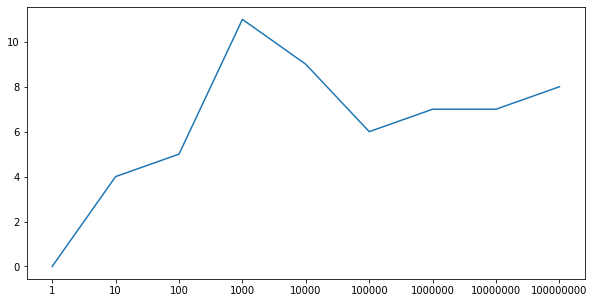

In [ ]:
N = 10
e_num = 100

T_values = []
success_rates = []

s = time.time()
for  i in range(9):
  temp = 10 ** i
  success = []
  for j in range(e_num):
    initial_position = [randrange(N) for _ in range(N)]
    solution, result = simulatedAnnealing(initial_position, temp)
    success.append(result)

  avg_percentage = 0
  if len(success) != 0:
    avg_percentage = (success.count(True) / len(success)) * 100
  
  success_rates.append(avg_percentage)
  T_values.append(temp)

f = time.time()

print(T_values)
print(success_rates)
print(f"Total elapsed time: {f - s}.")

x = range(len(T_values))
fs = (10, 5)
fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, success_rates)
plt.xticks(x, T_values)

plt.show()

When the code above was run for each of the annualing rates below, following results were obtained.

Success rates for different values of annealing rate: 

* for 0.9 -> max success rate 11% when T = 10^5
* for 0.8 -> max success rate 9% when T = 10^8
* for 0.7 -> max success rate 9% when T = 10^8
* for 0.6 -> max success rate 8% when T = 10^2
* for 0.5 -> max success rate 9% when T = 10^7
* for 0.4 -> max success rate 7% when T = 10^8
* for 0.3 -> max success rate 7% when T = 10^7
* for 0.2 -> max success rate 7% when T = 10^7
* for 0.1 -> max success rate 7% when T = 10^7 and T = 10^8

Since maximum success rate we can get is 11%, the following values for parameters were chosen:
* T = 100000
* annealingRate = 0.9

Below are the results obtained by using these values.

### N = 10

In [ ]:
N = 10 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for simulated annealing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  initial_position = [randrange(N) for _ in range(N)]
  solution, success[i] = simulatedAnnealing(initial_position, 100000)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for simulated annealing with N = 10: 
Total elapsed time: 18.857218265533447.
[0.19709372520446777, 0.014523506164550781, 0.20336103439331055, 0.1919095516204834, 0.19020771980285645, 0.2074735164642334, 0.20010852813720703, 0.221785306930542, 0.19571971893310547, 0.19856619834899902, 0.19742846488952637, 0.19750499725341797, 0.2054448127746582, 0.19556570053100586, 0.20376205444335938, 0.19788098335266113, 0.19925975799560547, 0.21435046195983887, 0.1938929557800293, 0.20002031326293945, 0.010555505752563477, 0.21078729629516602, 0.19304227828979492, 0.20299220085144043, 0.2004842758178711, 0.19763636589050293, 0.19814252853393555, 0.20681262016296387, 0.20451641082763672, 0.19820570945739746, 0.19763660430908203, 0.0162351131439209, 0.19631314277648926, 0.19784116744995117, 0.20239973068237305, 0.19361615180969238, 0.19978570938110352, 0.19687485694885254, 0.19780540466308594, 0.21264410018920898, 0.01078486442565918, 0.18982267379760742, 0.19701266288757324, 0.19757723808288574

### N = 20

In [ ]:
N = 20 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for simulated annealing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  initial_position = [randrange(N) for _ in range(N)]
  solution, success[i] = simulatedAnnealing(initial_position, 100000)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for simulated annealing with N = 20: 
Total elapsed time: 297.6113066673279.
[3.1123483180999756, 3.056330680847168, 0.6788187026977539, 0.5496726036071777, 3.0361709594726562, 3.0101687908172607, 3.041325092315674, 3.0361251831054688, 3.0560691356658936, 3.0546584129333496, 3.0463297367095947, 2.999570846557617, 3.103525161743164, 3.0478639602661133, 3.0898237228393555, 3.073700428009033, 3.1119627952575684, 3.0548579692840576, 3.040700912475586, 3.069674253463745, 3.1032097339630127, 3.0787453651428223, 3.0043561458587646, 3.0360076427459717, 3.0744733810424805, 3.059948444366455, 3.0540919303894043, 3.128096342086792, 3.0872294902801514, 3.112929582595825, 3.097543954849243, 3.059943199157715, 3.0819249153137207, 3.0243852138519287, 3.080491304397583, 3.054135322570801, 3.105220317840576, 3.0666067600250244, 3.0935685634613037, 3.0522301197052, 3.0534138679504395, 3.070136547088623, 3.0230488777160645, 2.982520818710327, 3.040738344192505, 0.4364194869995117, 3.0211095809936523